# SWMAL Exercise


## Convolutional Neural Networks (CNNs)
<details>
For the journal: 

* write an introduction to CNNs (what are CNNs, what is a convolution layer, etc..), 
* document your experiments towards the end-goal of reaching 'a high accuracy' (what did you try, what work/did not work), 
* document how you use '_generalization_' in your setup (us of simple hold-out/train-test split or k-fold, or etc..),
* produce some sort of '_learning-curve_' that illustrates the drop in cost- or increase in score-function with respect to, say training iteration (for inspiration see fig 4.20, 10-12 or 10.17 in [HOML]),
* document the final CNN setup (layers etc., perhaps as a graph/drawing), 
* discus on your iterations towards the end-goal and other findings you had,
* and, as always, write a conclusion.

If you use a code template from slides, HOML or the internet, then remember to add a reference to the original work in you journal.
Excercise 9 from [HOML], p.496 2nd./p.535 3rd. (slighty modified):

</details>

CNNs, short for Convolutional Neural Network, is a type of deep learning model, that is used for processing grid-like data, such as images or video classification, in general series data and pattern recognition.

CNNs consist of different layers, that make up the functionality of the model.

`Convolutional layers` are layers that apply learnable filters (kernels) to small regions of the input data. This makes the network automatically learn the features from the data. The layer helps capture patterns or elations in visual content. 

`Pooling Layer` reduces the dimensionality, which can be reduced by the amounts of pixel. This can be done by down sampling. 
The pooling layer has different approaches, such as, max pooling, average pooling and etc. Maxpooling takes the maximum value from a group of neighbouring pixels to the input feature map, while average pooling takes the average of all values in the local region

`Fully Connected Layers` is after serveral convolution and pooling layers. There can be more than one of these layers and they act as a traditional neural network. Meaning they connect ever neuron from the previous layer to ever neuron in the next layer. 

`Activation Functions` is the non-linearity in the model. This can be ReLu, sigmoid or many more. It helps the model to learn complex relationships between features. 

`Multiple Channels` is often used with process images. Which allow to have multiple channels for each colour and for the outline of entity. The convolutional filters are applied independently to each channet. 

**Generalization**

We are using a stratified k-fold cross-validation. K-fold is splitting the training set into k folds, then trainingthe model *k* times, holding out a different fold each time for evaluation. Stratified means maintenance the same propertions of classes as the orignal dataset when creating subsets or fold for training and validation. So the stratified k-fold performs strtified sampling to prodcue folds that contain a representative ratio of each class. With each iteration the code crates a clone of the classifer. With the clone we trains on the training folds and make prediction on the test fold. And then count the number of correct prediction and output the ratio of correct predictions. 

**Learning Curve** 

For the learning curves we plot two plot, one training loss over iterations and training accuracy over iterations. The x-axis is the number of epoch in both plots, and the y-axis is either the loss  or the accuracy.
Training loss is a measure of how well the machine learning model is performing on the training data. We can observe that thoughout epochs training loss minimize and the predicted value becomes closer to the actual value. 
Training accuracy is the accuracy over each epoch. As we can observe that toughtout the epoch we becomes closer to 1. of course it do not rise for every epoch, but the overall curve does.

**Code setup**
We are using a CNN and the dataset is frim mnist.
1. We load the libary we are using
2. We create train and test data from mnist  
3. We Preprocess the data with reshape and as type and convert y into one-hot encoded formate, so meaning each class is represented as a binary vector.
4. Create the CNN model (Explaining with the piceture)
5. Set up Stratified K-Fold cross-validation and lists to store training metrics at each iteration
6. Loop over folds and use the right data fold
7. Loop over epochs where we store each iteration for this fold
8. After we put the store epochs data into our metrics for this fold
9. Then we evaluate this fold
10. All folds is trained and evaluate
11. Calculate average test accuracy across folds
12. Convert lists to NumPy arrays for easier plotting
13. Plot Training Loss
14. Plot Accuracy Loss

**CNN setup**


**Iterations towards the end-goal**
The first thing that supprised us was the did not come  preparred, but need reshaping.

In the first creation of the code we inline the epoch in the model. ```model.fit(X_train_kfold, y_train_kfold, epochs=17, batch_size=64, verbose=0)```. The problem here was creating the plots, so we adjust the epochs to be in a forloop. This could probally be done more smoothly, however this works. 

**Experiment**
We did a little expriment, but not so much maybe since we got a good accuracy form the very start. ```Test average accuracy: 0.9915000200271606```. We tried changing the epochs from 10 to 15 to 17... and tried to change how many folds we performed. BJARKE IS GOING TO TEST THE REST ON HES PC LATER AND GIVE SOME NUMBER...
REMEMBER WHAT WORK AND NOT!

Test med 3 epochs and one extra:   ```model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))```

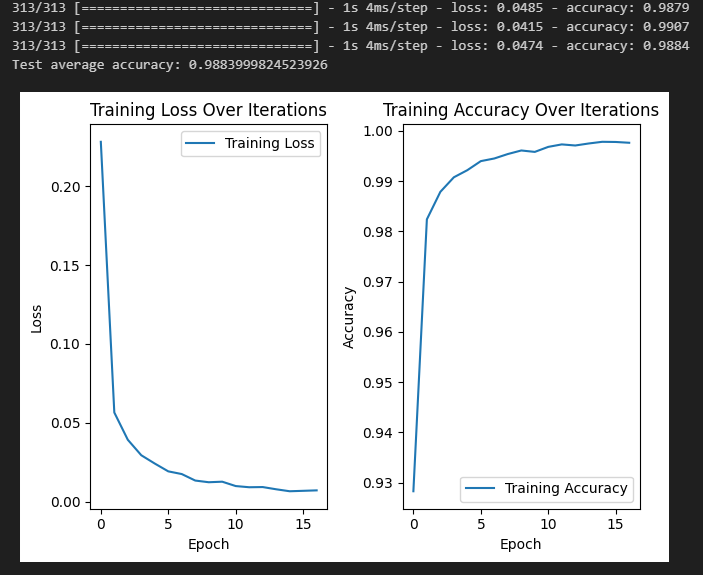

**Conclusion**

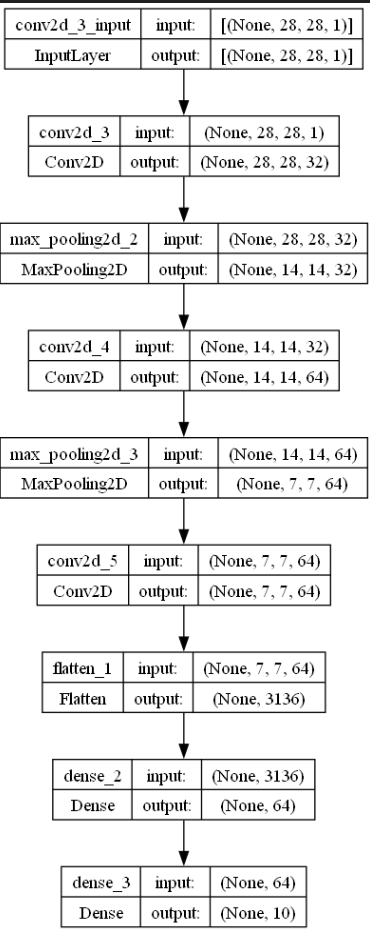

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                200768    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
=================================================================
Total params: 257,162
Trainable params: 257,162
Non-trainable params: 0
_________________________________________________________________

__"9. Build an CNN via the Keras API and try to achieve the highest possible accuracy on MNIST."__


313/313 [==============================] - 1s 4ms/step - loss: 0.0370 - accuracy: 0.9916
Test average accuracy: 0.991599977016449


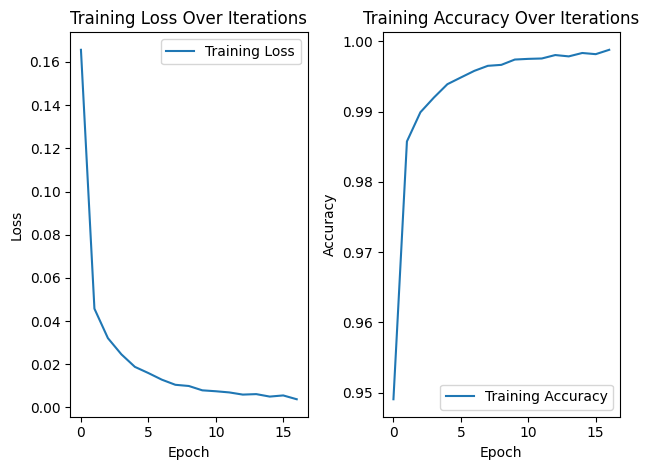

In [2]:
from keras.datasets.mnist import load_data
from keras.utils import plot_model, to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

(X_train, y_train ), (X_test, y_test) = load_data()

# Remove first element
X_train = X_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
X_test = X_test.reshape((-1 , 28, 28, 1)).astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 3, 3 means pixel... creates a 3x 3 pixels.
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding="same",activation='relu', input_shape=(28, 28 , 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Plot the model
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

folds = 6
kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
test_accuracy = []

train_losses = []
train_accuracies = []


for train, val in kfold.split(X_train, y_train.argmax(1)):

    model = createModel()

    X_train_kfold, x_val_kfold = X_train[train], X_train[val]
    y_train_kfold, y_val_kfold = y_train[train], y_train[val]

    fold_train_losses = []
    fold_train_accuracies = []

    for epoch in range(17): 
        history = model.fit(X_train_kfold, y_train_kfold, epochs=1, batch_size=64, verbose=0)

        fold_train_losses.append(history.history['loss'][0])
        fold_train_accuracies.append(history.history['accuracy'][0])

    train_losses.append(fold_train_losses)
    train_accuracies.append(fold_train_accuracies)


    test_loss, test_accuracy = model.evaluate(X_test, y_test)

avg_accuracy = np.mean(test_accuracy)
print(f'Test average accuracy: {avg_accuracy}')

train_losses = np.array(train_losses)
train_accuracies = np.array(train_accuracies)

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(np.mean(train_losses, axis=0), label='Training Loss')
plt.title('Training Loss Over Iterations')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(np.mean(train_accuracies, axis=0), label='Training Accuracy')
plt.title('Training Accuracy Over Iterations')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()